In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm
from scipy.special import erf

In [2]:
# Time
delta = 0.1
t = np.arange(0, 500, delta)
n = len(t)

# External electric field
Fw = 0.00005
w = 0.1
F = Fw * np.sin(w * t) * erf(0.01 * t)

# Time-dependent wave function
psi = np.zeros((2, n), dtype=complex)
psi[:, 0] = [1, 0]

# Energy of levels
Ea = 1
Eb = 1.5

# Transition dipole moment
muab = 1
muba = muab

# Hamiltonian and dipole moment operators
H0 = np.array([[Ea, 0], [0, Eb]])
mu = np.array([[0, muab], [muba, 0]])
V = -mu

# Time-dependent dipole moment (polarization)
P = np.zeros(n, dtype=float)
P[0] = np.dot(psi[:, 0], np.matmul(mu, psi[:, 0])).real

In [3]:
for k in range(1, n):

    psi[:, k] = np.matmul(expm(-1j * (H0 + V * F[k - 1]) * delta), psi[:, k - 1])

    P[k] = np.dot(np.conjugate(psi[:, k]), np.matmul(mu, psi[:, k])).real

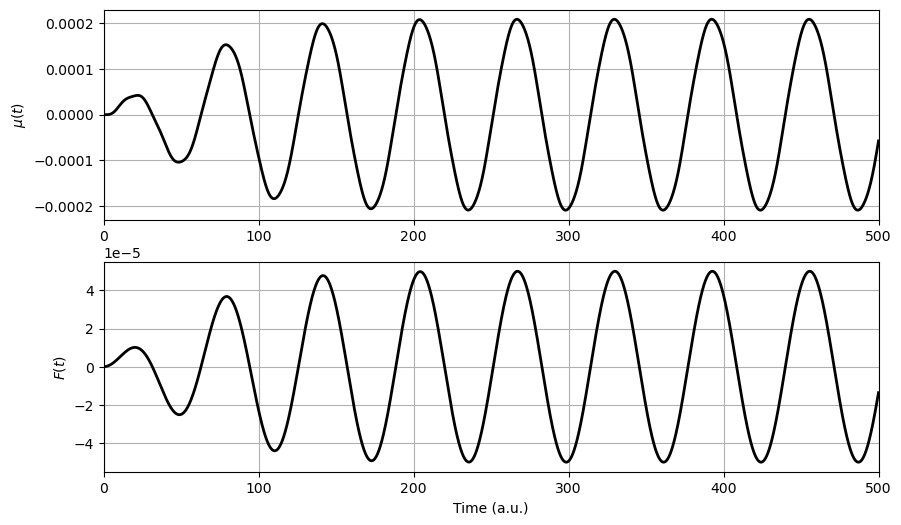

In [4]:
fig = plt.figure(figsize=(10, 6))

ax = plt.subplot(2, 1, 1, xlim=(0, 500))
plt.plot(t, P, "k-", linewidth=2.0)
plt.grid(True)
plt.ylabel(r"$\mu(t)$")

ax = plt.subplot(2, 1, 2, xlim=(0, 500))
plt.plot(t, F, "k-", linewidth=2.0)
plt.grid(True)
plt.ylabel(r"$F(t)$")

plt.xlabel("Time (a.u.)")

plt.show()

In [5]:
alpha_numerical = np.max(P) / Fw

print(f"Polarizability: {alpha_numerical : 4.2f} a.u.")

Polarizability:  4.17 a.u.


In [6]:
Eba = Eb - Ea

alpha_analytic = muab * muba * (1.0 / (Eba - w) + 1.0 / (Eba + w))

print(f"Polarizability: {alpha_analytic : 4.2f} a.u.")

Polarizability:  4.17 a.u.


In [7]:
epsilon = 0.01
wa = np.arange(0, Eba - epsilon, 0.001)
wb = np.arange(Eba + epsilon, 1, 0.001)

alpha_wa = muab * muba * (1.0 / (Eba - wa) + 1.0 / (Eba + wa))
alpha_wb = muab * muba * (1.0 / (Eba - wb) + 1.0 / (Eba + wb))

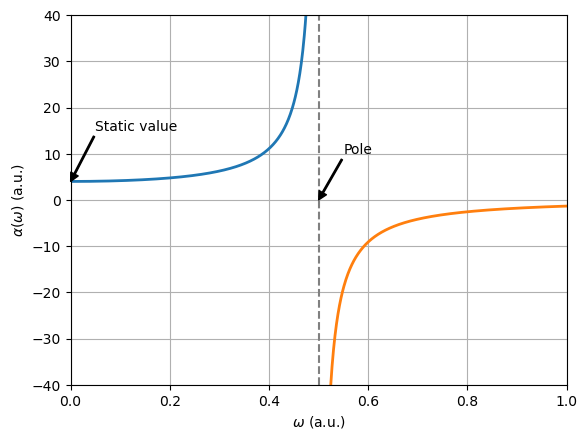

In [8]:
ax = plt.subplot(1, 1, 1, xlim=(0, 1), ylim=(-40, 40))

plt.plot(wa, alpha_wa, lw=2)
plt.plot(wb, alpha_wb, lw=2)

plt.vlines(Eba, -40, 40, color="grey", linestyles="--")

plt.ylabel(r"$\alpha(\omega)$ (a.u.)")
plt.xlabel(r"$\omega$ (a.u.)")

plt.annotate(
    "Static value",
    (0, alpha_wa[0]),
    xytext=(0.05, 15),
    arrowprops={"width": 1, "headwidth": 6, "headlength": 6, "color": 'black'},
)

plt.annotate(
    "Pole",
    (Eba, 0),
    xytext=(0.55, 10),
    arrowprops={"width": 1, "headwidth": 6, "headlength": 6, 'color': 'black'},
)

plt.grid(True)

plt.show()